# 03 - Exploratory Data Analysis (EDA)

This notebook explores the cleaned qualifying & race datasets.  
Focus: **Williams F1 Team** performance in the 2023 Bahrain GP.  

Goals:
- Filter Williams data
- Inspect qualifying & race outcomes
- Compare driver lap times
- Explore stint pace evolution


## Import & Paths

In [29]:
# Imports
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# File paths
processed_path = r"C:\UNI\Code\F1_Race_Predictor\data\processed"
os.makedirs(processed_path, exist_ok=True)

# Parameters
season = 2023
team = "Williams"   # default focus team
single_gp = None    # set e.g. "Bahrain" to run only one GP, else full season

# --- Function to process one race ---
def process_race(season, gp, team="Williams"):
    # Load race session
    race = fastf1.get_session(season, gp, "R")
    race.load()

    # Pick team laps
    laps = race.laps.pick_teams(team)

    if laps.empty:
        print(f"No laps found for {team} in {gp} {season}.")
        return None

    # Average lap times per driver
    avg_lap_times = (
        laps.groupby("Driver")["LapTime"]
        .mean()
        .dt.total_seconds()
        .reset_index(name="AvgLapTime_sec")
    )

    # Add race + team info
    avg_lap_times["Race"] = gp
    avg_lap_times["Team"] = team

    return avg_lap_times

# --- Run analysis ---
if single_gp:
    # Just one GP
    df = process_race(season, single_gp, team)
else:
    # Whole season
    schedule = fastf1.get_event_schedule(season)
    gps = schedule["EventName"].tolist()

    results = []
    for gp in gps:
        try:
            race_df = process_race(season, gp, team)
            if race_df is not None:
                results.append(race_df)
        except Exception as e:
            print(f"Skipping {gp}: {e}")

    df = pd.concat(results, ignore_index=True)

# --- Save processed results ---
if df is not None and not df.empty:
    output_file = os.path.join(processed_path, f"{team}_{season}_avg_laps.csv")
    df.to_csv(output_file, index=False)
    print(f"Saved results to {output_file}")
else:
    print("No data to save.")


logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
events      WARNING 	Correcting user input 'Pre-Season Testing' to 'British Grand Prix'
core           INFO 	Loading data for British Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_

Saved results to C:\UNI\Code\F1_Race_Predictor\data\processed\Williams_2023_avg_laps.csv


## Load Cleaned Data

In [14]:
q_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_qualifying_clean.csv")
r_results = pd.read_csv(fr"{processed_path}\{season}_{gp}_race_clean.csv")

print("Qualifying Data:")
display(q_results.head())

print("Race Data:")
display(r_results.head())

Qualifying Data:


,Drivernumber,Broadcastname,Abbreviation,Driverid,Teamname,Teamcolor,Teamid,Firstname,Lastname,Fullname,...,Q1,Q2,Q3,Time,Status,Points,Laps,Q1_sec,Q2_sec,Q3_sec
0,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,0 days 00:01:31.295000,0 days 00:01:30.503000,0 days 00:01:29.708000,NaN,NaN,NaN,NaN,91.295,90.503,89.708
1,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,0 days 00:01:31.479000,0 days 00:01:30.746000,0 days 00:01:29.846000,NaN,NaN,NaN,NaN,91.479,90.746,89.846
2,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,0 days 00:01:31.094000,0 days 00:01:30.282000,0 days 00:01:30,NaN,NaN,NaN,NaN,91.094,90.282,90.000
3,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,0 days 00:01:30.993000,0 days 00:01:30.515000,0 days 00:01:30.154000,NaN,NaN,NaN,NaN,90.993,90.515,90.154
4,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,0 days 00:01:31.158000,0 days 00:01:30.645000,0 days 00:01:30.336000,NaN,NaN,NaN,NaN,91.158,90.645,90.336


Race Data:


,Drivernumber,Broadcastname,Abbreviation,Driverid,Teamname,Teamcolor,Teamid,Firstname,Lastname,Fullname,...,Classifiedposition,Gridposition,Q1,Q2,Q3,Time,Status,Points,Laps,Finished
0,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,1,1.0,NaN,NaN,NaN,0 days 01:33:56.736000,Finished,25.0,57.0,1
1,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,2,2.0,NaN,NaN,NaN,0 days 00:00:11.987000,Finished,18.0,57.0,1
2,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,3,5.0,NaN,NaN,NaN,0 days 00:00:38.637000,Finished,15.0,57.0,1
3,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,4,4.0,NaN,NaN,NaN,0 days 00:00:48.052000,Finished,12.0,57.0,1
4,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,5,7.0,NaN,NaN,NaN,0 days 00:00:50.977000,Finished,10.0,57.0,1


In [16]:
print(q_results.columns)


Index(['Drivernumber', 'Broadcastname', 'Abbreviation', 'Driverid', 'Teamname',
       'Teamcolor', 'Teamid', 'Firstname', 'Lastname', 'Fullname',
       'Headshoturl', 'Countrycode', 'Position', 'Classifiedposition',
       'Gridposition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'Laps',
       'Q1_sec', 'Q2_sec', 'Q3_sec'],
      dtype='object')


## Filter for Williams

In [17]:
williams_q = q_results[q_results['Teamname'] == 'Williams']
williams_r = r_results[r_results['Teamname'] == 'Williams']

print("Williams Qualifying Results:")
display(williams_q)

print("Williams Race Results:")
display(williams_r)


Williams Qualifying Results:


,Drivernumber,Broadcastname,Abbreviation,Driverid,Teamname,Teamcolor,Teamid,Firstname,Lastname,Fullname,...,Q1,Q2,Q3,Time,Status,Points,Laps,Q1_sec,Q2_sec,Q3_sec
14,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,0 days 00:01:31.461000,NaN,NaN,NaN,NaN,NaN,NaN,91.461,NaN,NaN
15,2,L SARGEANT,SAR,sargeant,Williams,37BEDD,williams,Logan,Sargeant,Logan Sargeant,...,0 days 00:01:31.652000,NaN,NaN,NaN,NaN,NaN,NaN,91.652,NaN,NaN


Williams Race Results:


,Drivernumber,Broadcastname,Abbreviation,Driverid,Teamname,Teamcolor,Teamid,Firstname,Lastname,Fullname,...,Classifiedposition,Gridposition,Q1,Q2,Q3,Time,Status,Points,Laps,Finished
9,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,10,15.0,NaN,NaN,NaN,0 days 00:01:29.774000,Finished,1.0,57.0,1
11,2,L SARGEANT,SAR,sargeant,Williams,37BEDD,williams,Logan,Sargeant,Logan Sargeant,...,12,16.0,NaN,NaN,NaN,0 days 00:00:01.136000,Lapped,0.0,56.0,1


## Qualifying Analysis

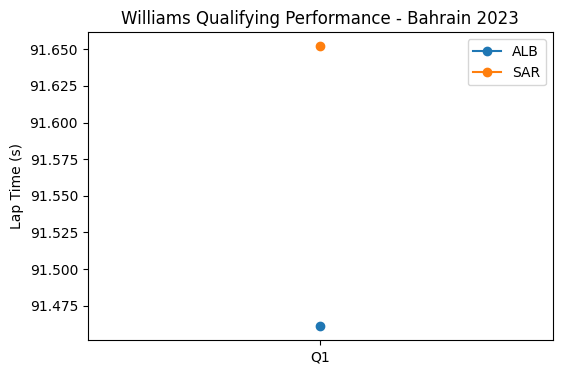

In [22]:
plt.figure(figsize=(6,4))
for driver in williams_q['Abbreviation']:
    times = williams_q[williams_q['Abbreviation']==driver][['Q1_sec','Q2_sec','Q3_sec']].values.flatten()
    plt.plot(['Q1','Q2','Q3'], times, marker='o', label=driver)

plt.title("Williams Qualifying Performance - Bahrain 2023")
plt.ylabel("Lap Time (s)")
plt.legend()
plt.show()


## Qualifying Analysis – Bahrain 2023

For the Bahrain 2023 Grand Prix, both Williams drivers (Alex Albon and Logan Sargeant) were eliminated in Q1.  
This means that neither driver progressed into Q2 or Q3, so only Q1 lap times are available.

**Observations:**
- Albon set the faster lap time (~91.47s) compared to Sargeant (~91.65s).
- The gap between the two drivers was very small (~0.18s).
- The limited data makes deeper analysis of Williams’ qualifying pace difficult, but it confirms that both drivers were near the cutoff point.


## Race Analysis - Lap Times

In [26]:
# Explore Williams lap times
laps = race.laps.pick_teams('Williams')

# Average lap times per Williams driver
avg_lap_times = laps.groupby('Driver')['LapTime'].mean().dt.total_seconds().sort_values()

# Format into M:SS.mmm
def format_laptime(seconds):
    minutes = int(seconds // 60)
    secs = seconds % 60
    return f"{minutes}:{secs:06.3f}"

print("Average Lap Times (Williams Drivers):")
for driver, t in avg_lap_times.items():
    print(f"{driver}: {format_laptime(t)}")


Average Lap Times (Williams Drivers):
ALB: 1:40.465
SAR: 1:40.676


## Stint Analysis 

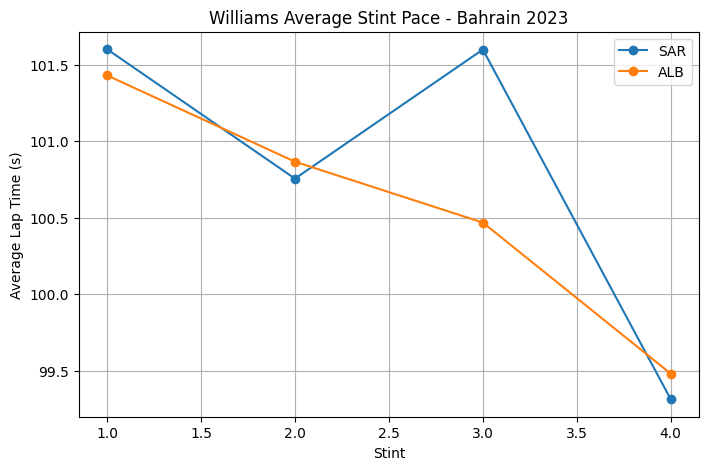

In [28]:
#Average stint pace comparison for Williams drivers
drivers = laps['Driver'].unique()

plt.figure(figsize=(8, 5))

for drv in drivers:
    drv_laps = laps.pick_drivers(drv)
    drv_stints = drv_laps['Stint'].unique()
    avg_stint_times = []

    for stint in drv_stints:
        stint_laps = drv_laps[drv_laps['Stint'] == stint]
        avg_time = stint_laps['LapTime'].mean()
        avg_stint_times.append(avg_time.total_seconds())

    plt.plot(drv_stints, avg_stint_times, marker='o', label=drv)

plt.xlabel("Stint")
plt.ylabel("Average Lap Time (s)")
plt.title("Williams Average Stint Pace - Bahrain 2023")
plt.legend()
plt.grid(True)
plt.show() 

### Interpretation – Williams Average Stint Pace (Bahrain 2023)

- **Stint 1**: Both drivers start around ~101.4–101.5s, with Sargeant slightly slower than Albon.  
- **Stint 2**: Both improve pace, dipping closer to 101s. Albon maintains a marginal edge.  
- **Stint 3**: Sargeant’s pace worsens, while Albon stays consistent. This suggests tyre degradation or setup differences impacted SAR more heavily.  
- **Stint 4**: Both drivers find their fastest stint pace (~99.3–99.5s). Albon again edges Sargeant, showing stronger tyre management in the final phase.  

**Key takeaway**: Albon shows greater consistency and adaptability across stints, while Sargeant fluctuates more in performance. Williams’ overall trend suggests late-race pace improvement (possibly due to lighter fuel load and better tyre compound).
